# Домашняя работа по kNN

#### ** Задание 1**

Завершаем практическое задание №2. Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

In [1]:
# conda install -c conda-forge python-levenshtein
# или pip install python-levenshtein

import Levenshtein
import numpy as np

In [2]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [3]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

В качестве решения этого задания я выведу два ближайших (по метрике растояния Ливенштейна) имени к каждому из результатов расшифровки речи.

In [4]:
for recognized_name in speech_recognition:
    print(recognized_name + ':')
    buffer=[]
    for real_name in claim_list:
        buffer.append(Levenshtein.distance(recognized_name, real_name))
    index=np.array(buffer).argsort()
    for ix in range(0,2):
        print('  ' + claim_list[index[ix]] + '(' + str(Levenshtein.distance(recognized_name, claim_list[index[ix]])) + ')')

кучменко она:
  Кущенко Анна(5)
  Груздева Алина(10)
кущенко оксана:
  Кущенко Анна(5)
  Шехавцова Анна(11)
груздь алина:
  Груздева Алина(5)
  Козлова Алена(9)
рычихина наталья:
  Гречихина Наталья(3)
  Чистякова Анастасия(12)
шиховцева на:
  Шехавцова Анна(6)
  Козлова Алена(9)
чистова анастасия:
  Чистякова Анастасия(4)
  Гречихина Наталья(12)


#### Задание 2

Постройте модель kNN для распознавания цифр. Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

In [14]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randrange

In [9]:
digits = datasets.load_digits()

In [10]:
X_digits = digits.data
Y_digits = digits.target

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.1, random_state=17)

In [12]:
knn = KNeighborsClassifier( n_neighbors = 5)
knn.fit(X_train,Y_train)
Y_test_predict = knn.predict(X_test)

In [13]:
knn.score( X_test, Y_test )

0.9722222222222222

А давайте найдем лучшее значение для параметра n_neighbors.
Для этого рассмотрим отрезок от 1 до 10. Будем повторять разбиение train_test_split с разными значениями random_state для генерации различных комбинаций разбиений, а полученнмые значения функции качества осреднять.

In [15]:
score_inertia = []
ns = range(1,10)

for n in ns:
    buffer = []
    for i in range(1,101):
        X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.1, random_state=randrange(1000))
        knn = KNeighborsClassifier( n_neighbors = n)
        knn.fit(X_train,Y_train)
        buffer.append(knn.score( X_test, Y_test ))
    score_inertia.append(np.array(buffer).mean())

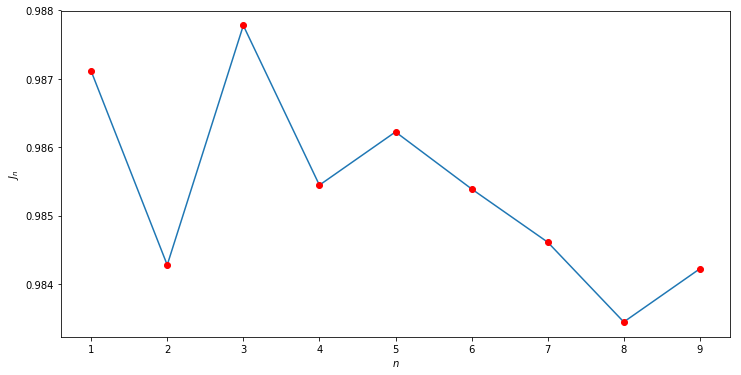

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(ns, score_inertia)
plt.plot(ns, score_inertia ,'ro')
plt.xlabel('$n$')
plt.ylabel('$J_n$')
plt.show()

In [17]:
Таким образом лучшее значение n_neighbors для метрики score hfdyj 3.

SyntaxError: invalid syntax (<ipython-input-17-30cd1c307d27>, line 1)